# 0. Basic Setup

In [3]:
## common imports
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

## to make this notebook's output stable across runs
np.random.seed(42)

In [4]:
## import sklearn packages
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve

In [5]:
## read the data
data = pd.read_csv('../final_project_data/insurance_classification_data.csv')

In [6]:
data.shape

(1795672, 89)

In [7]:
data.head()

,uniqueID,Var01,Var03,Var07,Var10,Var11,Var13,Var14,Var19,Var20,...,c05,c16,c26,c34,c35,c38,c39,c40,id,train
0,352373,A,A,0,2.0,B,A,A,C,B,...,28.0,8.0,21.0,20.0,19.0,14.0,17.0,13.0,8747.0,Y
1,352373,A,A,0,2.0,B,A,A,C,B,...,28.0,8.0,21.0,20.0,19.0,14.0,17.0,13.0,8747.0,Y
2,765898,A,A,0,2.0,B,A,A,C,B,...,29.0,21.0,21.0,20.0,19.0,5.0,17.0,13.0,8747.0,Y
3,765898,A,A,0,2.0,B,A,A,C,B,...,29.0,21.0,21.0,20.0,19.0,5.0,17.0,13.0,8747.0,Y
4,138374,B,A,0,2.0,A,E,A,C,B,...,24.0,24.0,21.0,0.0,19.0,30.0,17.0,13.0,40261.0,Y


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795672 entries, 0 to 1795671
Data columns (total 89 columns):
uniqueID    int64
Var01       object
Var03       object
Var07       int64
Var10       float64
Var11       object
Var13       object
Var14       object
Var19       object
Var20       object
Var21       object
Var23       object
Var25       object
Var26       float64
Var27       float64
Var28       float64
Var29       float64
Var30       int64
Var31       int64
Var32       int64
Var33       int64
Var34       int64
Var35       int64
Var42       int64
pred_s      float64
Var47       float64
Var48       object
Var49       object
Var50       int64
Var51       object
Var52       object
Var53       object
Var55       object
c01         object
c02         object
c03         object
c06         object
c07         object
c08         float64
c09         float64
c10         float64
c11         float64
c12         float64
c13         object
c14         object
c15         float64
c17       

#### Remove duplicates
<p> Q. Do we need to check duplication without uniqueID,id,Var47...? Do we choose to remove the duplications for all of the following analysis?

In [9]:
## check training set duplicates
duplicateRowsDF = data[data.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
duplicateRowsDF.shape

Duplicate Rows except first occurrence based on all columns are :


(1537, 89)

In [10]:
data = data.drop_duplicates()

In [11]:
print(data.shape)

(1794135, 89)


#### Train test split

In [12]:
## training set
data_train = data.loc[data.train=="Y"]
print(data_train.shape)

(1646270, 89)


In [13]:
## test set
data_test = data.loc[data.train=="N"]
print(data_test.shape)

(147865, 89)


# 1. Exploratory Data Analysis | training set

## Tasks:
<p>check for missings, distributions, duplicates, correlation, ...
<p>Q. how to deal with categorical data?
<p>Todo. correlcation analysis

#### Missing values 

In [14]:
## check training set missing values
total = data_train.isnull().sum()
percent = data_train.isnull().sum()/data_train.isnull().count()*100
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [15]:
# print(data_train.isnull().sum())

In [16]:
missing.sort_values(by=['Percent'], ascending = False)

,Total,Percent
c04,663757,40.318842
c39,436774,26.531128
c40,432324,26.260820
c38,421798,25.621435
c16,258918,15.727554
c05,252331,15.327437
id,163260,9.916964
c18,157720,9.580445
c15,155295,9.433143
c08,154590,9.390319


#### Distribution

In [17]:
def cat_distr(var):
    clean_var = data_train[var].fillna('Missing')
    var_counts = clean_var.value_counts()
    barplot = sns.barplot(x=var_counts.index, y=var_counts.values, alpha=1)
    return var_counts, barplot

(A    1477353
 B      72546
 Q      41182
 D      22447
 H      11150
 G      10868
 C       4889
 L       3480
 E       2119
 F        150
 I         42
 Z         18
 P         17
 J          7
 N          2
 Name: Var03, dtype: int64,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a24cd84a8>)

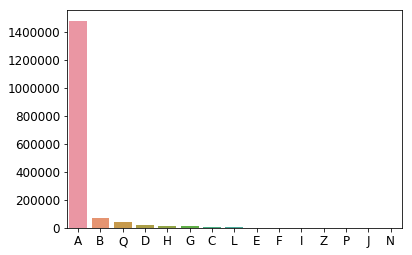

In [18]:
cat_distr('Var03')

(A    1525562
 B      98628
 C      22080
 Name: Var01, dtype: int64,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a24bcbeb8>)

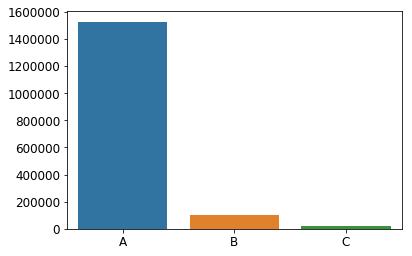

In [19]:
cat_distr('Var01')

(Missing    663757
 37.0       117448
 22.0       116979
 30.0       108399
 14.0       104846
 5.0         92679
 17.0        92440
 10.0        90592
 26.0        81311
 33.0        65597
 2.0         56748
 7.0         30819
 0.0         24655
 Name: c04, dtype: int64,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a24c5b5c0>)

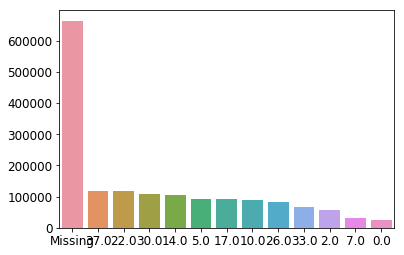

In [20]:
cat_distr('c04')

#### Categorical data & odrinary data, relation with classification target 0/1 (Boxplots)

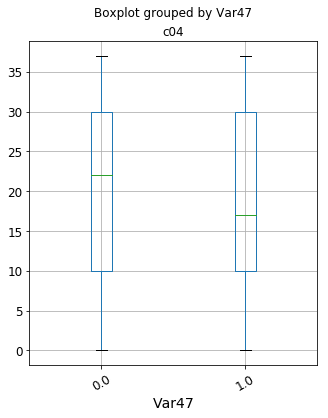

In [21]:
data_train.boxplot('c04','Var47', rot = 30,figsize=(5,6))

#### Current linear model accuracy pred_s  |  threshold = 50
<p> the following could be replaced by confusion matrix

In [22]:
Var47_counts = data_train['Var47'].value_counts()
print(Var47_counts)

0.0    836051
1.0    810219
Name: Var47, dtype: int64


In [23]:
TP = len(data_train[(data_train['pred_s']>=50) & (data_train['Var47']==1)]) 
FN = len(data_train[(data_train['pred_s']<50) & (data_train['Var47']==0)]) 
accuracy = (TP+FN)/(data_train.shape[0])
print(accuracy)

0.7108779240343321


# 2. Training Classifier

<p>Q. How to impute missing values
<p>Q. What could we do with categorical data ABCDE? What could we do with discreate numerical data 1 2 3 4 5?
<p>Q. In theory, we can only use training set for model building, however, the categorical data make onehot encoding complicated if we conduct it for train and test set seperately. And error "X has 254 features per sample; expecting 273" happened. Is there any good way to do it?

## 2.0

In [24]:
# Look at some of the unique values within each variable | traning set
for col in list(data_train.columns):
    uniques = data_train[col].unique() # get a list of unique values  
    uniques.sort()
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(uniques)<30:
        print(col + ':')
        print(uniques)
    else:
        print(col + ': ' + str(len(uniques)) + ' unique values')

uniqueID: 780409 unique values
Var01:
['A' 'B' 'C']
Var03:
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'L' 'N' 'P' 'Q' 'Z']
Var07:
[0 1 2 3 4 5]
Var10:
[-1.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 nan]
Var11:
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'Z']
Var13:
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'Z']
Var14:
['A' 'B' 'C' 'D' 'E' 'F' 'Z']
Var19:
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'Z']
Var20:
['A' 'B']
Var21:
['A' 'B' 'C' 'D' 'Z']
Var23:
['A' 'B' 'C' 'Z']
Var25:
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'Z']
Var26:
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. nan]
Var27:
[-1.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 nan]
Var28:
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. nan]
Var29:
[-1.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 nan]
Var30:
[0 1 2 3]
Var31:
[0 1 2 3]
Var32:
[0 1 2 3]
Var33:
[0 1 2 3]
Var34:
[0 1 2 3]
Var

In [25]:
# Look at some of the unique values within each variable | test set
for col in list(data_test.columns):
    uniques = data_test[col].unique() # get a list of unique values  
    uniques.sort()
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(uniques)<30:
        print(col + ':')
        print(uniques)
    else:
        print(col + ': ' + str(len(uniques)) + ' unique values')

uniqueID: 69125 unique values
Var01:
['A' 'B' 'C']
Var03:
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'L' 'N' 'Q' 'Z']
Var07:
[0 1 2 3 4 5]
Var10:
[-1.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 nan]
Var11:
['A' 'B' 'C' 'D' 'E' 'F' 'G']
Var13:
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M']
Var14:
['A' 'B' 'C' 'D' 'E' 'F' 'Z']
Var19:
['A' 'B' 'C' 'D' 'E' 'F' 'G']
Var20:
['A' 'B']
Var21:
['A' 'B' 'C' 'D' 'Z']
Var23:
['A' 'B' 'C' 'Z']
Var25:
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M']
Var26:
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.]
Var27:
[-1.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.]
Var28:
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
Var29:
[-1.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.]
Var30:
[0 1 2 3]
Var31:
[0 1 2 3]
Var32:
[0 1 2 3]
Var33:
[0 1 2 3]
Var34:
[0 1 2 3]
Var35:
[0 1 2 3 4 5]
Var42:
[0 1 2 3]
pred_s:
[nan]
Var47:
[nan]
Var48:

#### Impute missing values
<p> We use a simply way: impute all missing values for categorical data with "Missing", impute all missing values for numerical data with 0.

In [26]:
## categorical variables
# cat_data = data_train.select_dtypes(include=['object'].copy())
cat_list = list(data_train.select_dtypes(include=['object']).copy())

In [27]:
print(cat_list)

['Var01', 'Var03', 'Var11', 'Var13', 'Var14', 'Var19', 'Var20', 'Var21', 'Var23', 'Var25', 'Var48', 'Var49', 'Var51', 'Var52', 'Var53', 'Var55', 'c01', 'c02', 'c03', 'c06', 'c07', 'c13', 'c14', 'c17', 'c20', 'c21', 'c22', 'c23', 'c24', 'c25', 'c28', 'c29', 'c30', 'c31', 'c32', 'c33', 'c36', 'c37', 'Var56', 'train']


In [43]:
data_ = data.copy()
data_[cat_list] = data_[cat_list].fillna("Missing") # impute all missing values for categorical data with "Missing"
data_ = data_.fillna(0) # impute all missing values for numerical data with 0

In [44]:
## Look at some of the unique values within each variable | traning set after imput missing values
for col in list(data_.columns):
    uniques = data_[col].unique() # get a list of unique values  
    uniques.sort()
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(uniques)<30:
        print(col + ':')
        print(uniques)
    else:
        print(col + ': ' + str(len(uniques)) + ' unique values')

uniqueID: 849534 unique values
Var01:
['A' 'B' 'C']
Var03:
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'L' 'N' 'P' 'Q' 'Z']
Var07:
[0 1 2 3 4 5]
Var10:
[-1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.
 17.]
Var11:
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'Z']
Var13:
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'Z']
Var14:
['A' 'B' 'C' 'D' 'E' 'F' 'Z']
Var19:
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'Z']
Var20:
['A' 'B']
Var21:
['A' 'B' 'C' 'D' 'Z']
Var23:
['A' 'B' 'C' 'Z']
Var25:
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'Z']
Var26:
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.]
Var27:
[-1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.
 17.]
Var28:
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
Var29:
[-1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.
 17.]
Var30:
[0 1 2 3]
Var31:
[0 1 2 3]
Var32:
[0 1 2 3]
Var33:
[0 1 2 3]
Var34:
[0 1 2 3]
Var

#### Select input data for training models

In [45]:
print(list(data_))

['uniqueID', 'Var01', 'Var03', 'Var07', 'Var10', 'Var11', 'Var13', 'Var14', 'Var19', 'Var20', 'Var21', 'Var23', 'Var25', 'Var26', 'Var27', 'Var28', 'Var29', 'Var30', 'Var31', 'Var32', 'Var33', 'Var34', 'Var35', 'Var42', 'pred_s', 'Var47', 'Var48', 'Var49', 'Var50', 'Var51', 'Var52', 'Var53', 'Var55', 'c01', 'c02', 'c03', 'c06', 'c07', 'c08', 'c09', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c17', 'c18', 'c19', 'c20', 'c21', 'c22', 'c23', 'c24', 'c25', 'c27', 'c28', 'c29', 'c30', 'c31', 'c32', 'c33', 'c36', 'c37', 'Var54', 'Var56', 'Var02', 'Var04', 'Var05', 'Var06', 'Var08', 'Var09', 'Var12', 'Var15', 'Var16', 'Var18', 'Var22', 'Var24', 'c04', 'c05', 'c16', 'c26', 'c34', 'c35', 'c38', 'c39', 'c40', 'id', 'train']


In [31]:
## setting the inputs the output for our classification task
target = ['Var47']

features0 = ['Var01', 'Var03', 'Var07', 'Var10', 'Var11', 'Var13',
             'Var14', 'Var19', 'Var20', 'Var21', 'Var23', 'Var25', 'Var26',
             'Var27', 'Var28', 'Var29', 'Var30', 'Var31', 'Var32', 'Var33', 
             'Var34', 'Var35', 'Var42', 'Var48', 'Var49', 
             'Var50', 'Var51', 'Var52', 'Var53', 'Var55', 
             'c01', 'c02', 'c03', 'c06', 'c07', 'c08', 'c09', 'c10', 'c11', 'c12', 
             'c13', 'c14', 'c15', 'c17', 'c18', 'c19', 'c20', 'c21', 'c22', 'c23', 
             'c24', 'c25', 'c27', 'c28', 'c29', 'c30', 'c31', 'c32', 'c33', 'c36', 'c37', 
             'Var54', 'Var56', 'Var02', 'Var04', 'Var05', 'Var06', 'Var08', 'Var09', 
             'Var12', 'Var15', 'Var16', 'Var18', 'Var22', 'Var24', 
             'c04', 'c05', 'c16', 'c26', 'c34', 'c35', 'c38', 'c39', 'c40']

#### Reshape data and OneHot encoding

In [ ]:
X0 = data_[features0]
# X0 = data.drop(droplist1, axis=1, inplace=True)

#### X_train  & y_train

In [32]:
X0_train = data_train_[features0]
# X0 = data.drop(droplist1, axis=1, inplace=True)

In [33]:
## Onehot encoding
X0_train_ohe = pd.get_dummies(X0_train)

In [34]:
# X0_ohe_df.head().transpose()
# ## X0_ohe.to_csv ("../final_project_data/insurance_X0_ohe.csv", index = None, header=True)

In [35]:
X0_train = X0_train_ohe.fillna(0).values
y0_train = data_train[target].values

#### X_test & y_test

In [36]:
data_test_ = data_test.copy()
# impute all missing values for categorical data with "Missing"
data_test_[cat_list] = data_test_[cat_list].fillna("Missing") 
# impute all missing values for numerical data with 0
data_test_ = data_test_.fillna(0) 

In [38]:
X0_test = data_test_[features0]
X0_test_ohe = pd.get_dummies(X0_test) # Onehot encoding

In [39]:
X0_test = X0_test_ohe.fillna(0).values
y0_test = data_test[target].values

In [40]:
print("Train", X0_train.shape, y0_train.shape)
print("Test", X0_test.shape, y0_train.shape)

Train (1646270, 273) (1646270, 1)
Test (147865, 254) (1646270, 1)


## 2.1 Linear Classifier

In [41]:
# prepare Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
logit_clf = LogisticRegression(tol=0.0001, C=1.0, random_state=42, max_iter=100)  

In [42]:
# training and validation
logit_clf.fit(X0_train, y0_train) 
y0_train_logit_pred = logit_clf.predict(X0_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: X has 254 features per sample; expecting 273

In [ ]:
y0_test_logit_pred = logit_clf.predict(X0_test)

In [ ]:
print("Training Accuracy",(y0_train_logit_pred  == y0_train).mean())
print("Test Accuracy",(y0_test_logit_pred  == y0_test).mean())

## 2.2  Decision Tree Classifier

In [ ]:
## prepare Random Forest classifier
# from sklearn.linear_model import LinearRegression
# from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42, max_depth = 20)

In [ ]:
rf_clf.fit(X0_train, y0_train) 
y0_train_rf_pred = logit_rf.predict(X0_train)
y0_test_rf_pred = logit_rf.predict(X0_test)

print("Training Accuracy",(y0_train_rf_pred  == y0_train).mean())
print("Test Accuracy",(y0_test_rf_pred  == y0_test).mean())

In [ ]:
print("Random Forest Accuracy for Test Set:", accuracy_score(y_test, rf_clf.predict(X_test)))

## 2.3 Neural Nets

In [ ]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [ ]:
from datetime import datetime

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "."    
logdir = "{}//run-{}//".format(root_logdir, now)

In [ ]:
X_train = X0_train
X_test = X0_test
y_train = y0_train
y_test = y0_test

In [ ]:
## define validation and training sets
X_test = X_test.astype(np.int32)
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:100], X_train[100:]
y_valid, y_train = y_train[:100], y_train[100:]


n_inputs = 784  # number of features 
n_hidden1 = 147   
n_hidden2 = 70   
# dedfine more hidden layers
n_hidden3 = 50
n_outputs = 10 
tf.reset_default_graph()   # reset graph


# y place holder for output
# auxialrry variable 
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")
a = tf.placeholder(tf.float32,shape=(None),name='a')


summary1 = tf.reduce_mean(a, name="summary1")

#layer of network takes input of neurones  
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z
 

with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
    hidden3 = neuron_layer(hidden2, n_hidden3, name="hidden3", activation=tf.nn.relu)
    logits  = neuron_layer(hidden3, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

#learning rate - change if issues regrading convergence or others happen
learning_rate =1e-1
with tf.name_scope("train"):
    optimizer = tf.train.AdagradOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

#define accuracy 
with tf.name_scope("accuracy"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

#leave this
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [ ]:
from random import randint
n_epochs = 100  
batch_size = 100   

init = tf.global_variables_initializer()
saver = tf.train.Saver()


summary2 = tf.summary.scalar('Accuracy', summary1)
file_writer = tf.summary.FileWriter(logdir , tf.get_default_graph())

with tf.Session() as sess:
    init.run()
    acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
    print("Val accuracy init:", acc_val)
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Val accuracy:", acc_val)
        
        summary_str = summary2.eval(feed_dict={a: acc_val })
        file_writer.add_summary(summary_str, epoch)
   
    saver.save(sess, "./insurance_dnn_model.ckpt")   

In [ ]:
with tf.Session() as sess:                         
    saver.restore(sess, "./insurance_dnn_model.ckpt")   
    Z = logits.eval(feed_dict={X: X_test})
    y_test_dnn_pred = np.argmax(Z, axis=1)